In [86]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

In [87]:
import csv
with open('Epidermal_growth_factor_receptor_erbB1_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    EGFR_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

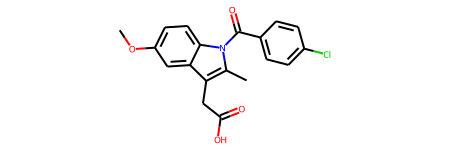

In [88]:
EGFR_ligands[2307]

In [89]:
# count of rings:
Chem.GetSSSR(EGFR_ligands[2307])

3

In [90]:
# count of rotatable bonds:
Chem.CalcNumRotatableBonds(EGFR_ligands[2307])

4

In [91]:
# count of all heavy/non-hydrogen atoms
EGFR_ligands[2307].GetNumHeavyAtoms()

25

In [92]:
# hydrogen bond acceptors / donors
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(EGFR_ligands[2307]), rdescriptors.CalcNumLipinskiHBD(EGFR_ligands[2307])

(5, 1)

In [95]:
# molecular weight
rdescriptors.CalcExactMolWt(EGFR_ligands[2307])

357.07678567199997

In [96]:
# topological polar surface area
rdescriptors.CalcTPSA(EGFR_ligands[2307])

68.53

In [32]:
# octanol-water partition coefficient
Descriptors.MolLogP(EGFR_ligands[2307])

3.9273200000000026

In [97]:
# the number of amide bonds in a molecule
rdMolDescriptors.CalcNumAmideBonds(EGFR_ligands[2307])

0

In [34]:
# the total number of atomic stereocenters (specified and unspecified)
rdMolDescriptors.CalcNumAtomStereoCenters(EGFR_ligands[2307])

0

In [35]:
# the number of saturated carbocycles for a molecule
rdMolDescriptors.CalcNumSaturatedCarbocycles(EGFR_ligands[2307])

0

In [36]:
# the number of saturated heterocycles for a molecule
rdMolDescriptors.CalcNumSaturatedHeterocycles(EGFR_ligands[2307])

0

In [37]:
EGFR_rings = [Chem.GetSSSR(l) for l in EGFR_ligands]
EGFR_rotatable = [Chem.CalcNumRotatableBonds(l) for l in EGFR_ligands]
EGFR_atomcount = [l.GetNumHeavyAtoms() for l in EGFR_ligands]
EGFR_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in EGFR_ligands]
EGFR_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in EGFR_ligands]
EGFR_molwt = [rdescriptors.CalcExactMolWt(l) for l in EGFR_ligands]
EGFR_tpsa = [rdescriptors.CalcTPSA(l) for l in EGFR_ligands]
EGFR_logp = [Descriptors.MolLogP(l) for l in EGFR_ligands]
EGFR_amide = [rdMolDescriptors.CalcNumAmideBonds(l) for l in EGFR_ligands]
EGFR_stereocenters = [rdMolDescriptors.CalcNumAtomStereoCenters(l) for l in EGFR_ligands]
EGFR_satcarb = [rdMolDescriptors.CalcNumSaturatedCarbocycles(l) for l in EGFR_ligands]
EGFR_sathet = [rdMolDescriptors.CalcNumSaturatedHeterocycles(l) for l in EGFR_ligands]

In [45]:
import pandas as pd
import seaborn as sns

In [46]:
df = pd.DataFrame(data={'set':'EGFR', 'rings': EGFR_rings,
                        'rotatable': EGFR_rotatable, 'atoms': EGFR_atomcount,
                        'hba': EGFR_hba, 'hbd': EGFR_hbd, 'molwt': EGFR_molwt,
                        'tpsa': EGFR_tpsa, 'logp': EGFR_logp, 'amide': EGFR_amide,
                        'stereocenters': EGFR_stereocenters, 'satcarb': EGFR_satcarb,
                        'sathet': EGFR_sathet})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,amide,stereocenters,satcarb,sathet
0,EGFR,3,12,38,10,3,537.261725,111.72,4.34270,1,0,0,0
1,EGFR,4,10,34,10,1,486.121859,117.23,5.13840,0,0,0,0
2,EGFR,4,8,38,11,3,516.259737,114.96,3.77340,3,0,0,1
3,EGFR,4,12,40,10,2,567.272466,95.09,5.09670,1,0,0,1
4,EGFR,5,10,40,9,3,535.269573,98.41,5.65260,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14357,EGFR,4,4,34,6,1,470.192961,67.23,5.35542,2,1,0,1
14358,EGFR,4,4,29,6,2,386.174276,83.27,3.54340,1,0,0,0
14359,EGFR,4,4,27,6,2,383.073991,82.53,3.32360,2,1,0,0
14360,EGFR,4,8,31,7,1,446.152097,68.74,4.27560,0,0,0,1


<AxesSubplot:>

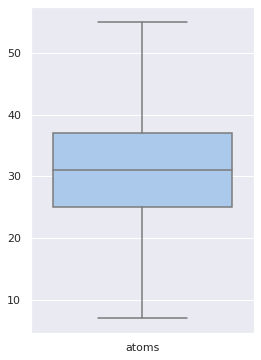

In [71]:
sns.set(rc={'figure.figsize':(4, 6)})
sns.boxplot(data=df[['atoms']], showfliers=False, palette='pastel')

<AxesSubplot:>

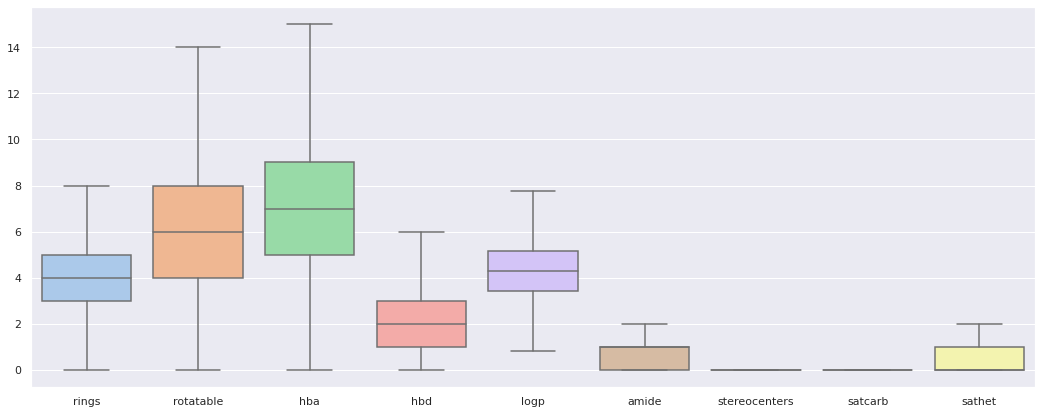

In [73]:
sns.set(rc={'figure.figsize':(18, 7)})
sns.boxplot(data=df[['rings', 'rotatable', 'hba', 'hbd', 'logp', 'amide', 'stereocenters', 'satcarb', 'sathet']], showfliers = False, palette='pastel')

<AxesSubplot:>

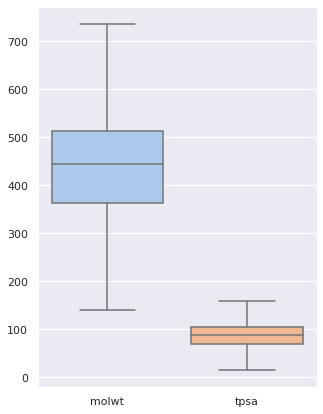

In [76]:
sns.set(rc={'figure.figsize':(5, 7)})
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False, palette='pastel')

In [60]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

RDKit ERROR: [23:08:02] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [23:54:27] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [23:54:27] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [23:54:27] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [23:54:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [23:54:27] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [23:54:27] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [23:54:27] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [23:54:27] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [23:54:27] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [23:54:27] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit 

7115

In [61]:
drugbank_rings = [Chem.GetSSSR(l) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]
drugbank_amide = [rdMolDescriptors.CalcNumAmideBonds(l) for l in drugs]
drugbank_stereocenters = [rdMolDescriptors.CalcNumAtomStereoCenters(l) for l in drugs]
drugbank_satcarb = [rdMolDescriptors.CalcNumSaturatedCarbocycles(l) for l in drugs]
drugbank_sathet = [rdMolDescriptors.CalcNumSaturatedHeterocycles(l) for l in drugs]

In [62]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp, 'amide': drugbank_amide,
                                 'stereocenters': drugbank_stereocenters, 'satcarb': drugbank_satcarb,
                                 'sathet': drugbank_sathet})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,amide,stereocenters,satcarb,sathet
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643,20,16,0,3
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570,12,9,0,2
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203,11,7,0,2
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613,13,10,0,1
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900,11,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,drugs,1,0,8,1,1,128.002892,20.23,2.04560,0,0,0,0
7111,drugs,3,3,24,9,5,340.079432,149.82,-1.32270,0,5,0,1
7112,drugs,6,14,79,27,13,1114.554641,403.10,1.54710,3,7,0,1
7113,drugs,0,13,21,5,0,330.147689,83.50,-0.00030,0,0,0,0


In [63]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,amide,stereocenters,satcarb,sathet
0,EGFR,3,12,38,10,3,537.261725,111.72,4.3427,1,0,0,0
1,EGFR,4,10,34,10,1,486.121859,117.23,5.1384,0,0,0,0
2,EGFR,4,8,38,11,3,516.259737,114.96,3.7734,3,0,0,1
3,EGFR,4,12,40,10,2,567.272466,95.09,5.0967,1,0,0,1
4,EGFR,5,10,40,9,3,535.269573,98.41,5.6526,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,drugs,1,0,8,1,1,128.002892,20.23,2.0456,0,0,0,0
21473,drugs,3,3,24,9,5,340.079432,149.82,-1.3227,0,5,0,1
21474,drugs,6,14,79,27,13,1114.554641,403.10,1.5471,3,7,0,1
21475,drugs,0,13,21,5,0,330.147689,83.50,-0.0003,0,0,0,0


In [77]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['atoms'])
melted_df

,set,variable,value
0,EGFR,atoms,38
1,EGFR,atoms,34
2,EGFR,atoms,38
3,EGFR,atoms,40
4,EGFR,atoms,40
...,...,...,...
21472,drugs,atoms,8
21473,drugs,atoms,24
21474,drugs,atoms,79
21475,drugs,atoms,21


<AxesSubplot:xlabel='variable', ylabel='value'>

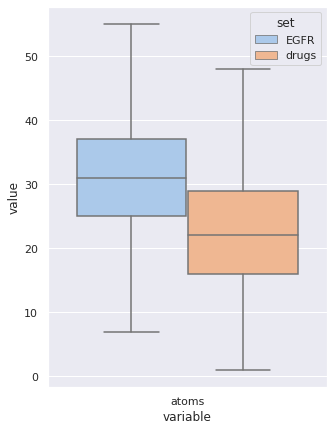

In [78]:
sns.set(rc={'figure.figsize':(5, 7)})
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False, palette='pastel')

The set of EGFR ligands tends to have structures with more heavy/non-hydrogen atoms than the dragbank dataset.

In [79]:
melted_df1 = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 
                                                           'hba', 'hbd', 'logp', 'amide', 
                                                           'stereocenters', 'satcarb', 'sathet'])
melted_df1

,set,variable,value
0,EGFR,rings,3.0
1,EGFR,rings,4.0
2,EGFR,rings,4.0
3,EGFR,rings,4.0
4,EGFR,rings,5.0
...,...,...,...
193288,drugs,sathet,0.0
193289,drugs,sathet,1.0
193290,drugs,sathet,1.0
193291,drugs,sathet,0.0


<AxesSubplot:xlabel='variable', ylabel='value'>

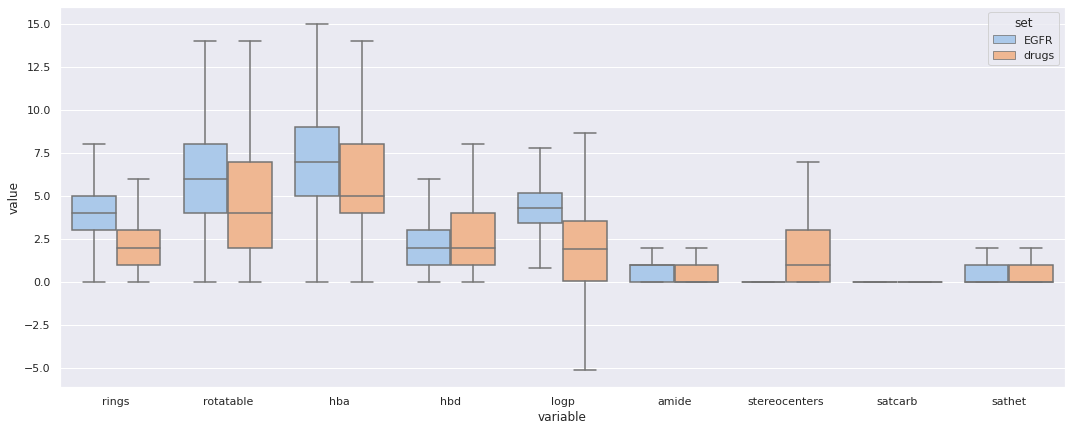

In [80]:
sns.set(rc={'figure.figsize':(18, 7)})
sns.boxplot(y='value', x='variable', hue='set', data=melted_df1, showfliers=False, palette='pastel')

The set of EGFR ligands has structures with more rings, rotatable bonds, hydrogen bond acceptors, octanol-water partition coefficient than the drugbank dataset. In contrast, the EGFR ligand set has the total number of atomic stereocenters equal to zero, while the drugbank dataset has an average number of stereocenters of about 1. It is possible that there is no stereocenters data in the dataset of EGFR ligands.

In [81]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,EGFR,molwt,537.261725
1,EGFR,molwt,486.121859
2,EGFR,molwt,516.259737
3,EGFR,molwt,567.272466
4,EGFR,molwt,535.269573
...,...,...,...
42949,drugs,tpsa,20.230000
42950,drugs,tpsa,149.820000
42951,drugs,tpsa,403.100000
42952,drugs,tpsa,83.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

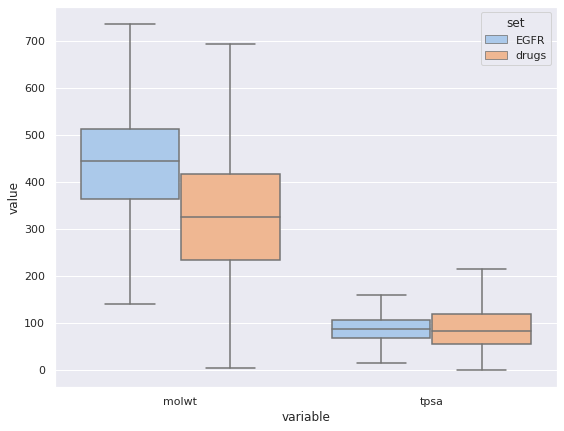

In [84]:
sns.set(rc={'figure.figsize':(9, 7)})
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False, palette='pastel')

The set of EGFR ligands tends to have higher molecular weight structures than the dragbank dataset.

Due to the differences described above, probably most of the compounds from my ligand dataset cannot be a drug.